In [1]:
import polars as pl
import json
import statistics

##### Load data

In [2]:
data_dir = '/Volumes/PortableSSD/CSS/data/processed/'

data_df = pl.read_csv(data_dir+'posts_2015-21_ps_min_2c_politics.csv')
with open(data_dir+'exact_matches_posts_10000.json') as f:
    exact_matches = json.load(f)
with open(data_dir+'sem_matches_posts_10000.json') as f:
    sem_matches = json.load(f)

In [3]:
data_df.head()

id,created_utc,subreddit,author,url,title,selftext,num_comments,score,upvote_ratio
str,i64,str,str,str,str,str,i64,i64,f64
"""589v04""",1476878103,"""The_Donald""","""gmousasi""","""https://i.redd…","""Just a rare ba…","""""",17,1242,100.0
"""589ygu""",1476879588,"""Enough_Sanders…","""12-juin-3049""","""http://www.red…","""Bernout gets e…","""""",12,28,100.0
"""58a7z5""",1476883248,"""EnoughTrumpSpa…","""TheIronTARDIS""","""http://np.redd…","""In case you ne…","""""",38,371,100.0
"""58aa2h""",1476883994,"""politics""","""Naggers123""","""http://www.bre…","""Poll: Hillary …","""""",170,305,100.0
"""58bnuv""",1476899246,"""politics""","""Metaprinter""","""https://gop.co…","""Trump asking t…","""""",38,24,100.0


##### Data exploration

In [ ]:
posts = data_df['title'].to_list()

In [5]:
len(posts)

9127279

##### Find metaphor matched posts

In [4]:
exact_ids = []
for key, matches in exact_matches.items():
    if len(matches[1]) > 0:
        exact_ids.extend(matches[1])

sem_ids = []
sem_thresh = 0.8
for key, matches in sem_matches.items():
    if matches[0] > 0:
        for match in matches[1]:
            if match[1] >= sem_thresh:
                sem_ids.append(match[2])

match_ids = exact_ids + sem_ids

##### Count average num_comments for metaphor matched posts vs non metaphor matched posts

In [5]:
meta_num_comments = data_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = data_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

metaphor matched posts : 42.02884615384615
non metaphor matched posts : 31.624905074174993


In [6]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 7.0
non metaphor matched posts : 7


##### Comparison by subreddits

##### politics

In [96]:
sub_df = data_df.filter(pl.col('subreddit')=='politics')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 91
metaphor matched posts : 120.89010989010988
non metaphor matched posts : 65.13940425214072


In [97]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 10
non metaphor matched posts : 10.0


##### SandersForPresident

In [98]:
sub_df = data_df.filter(pl.col('subreddit')=='SandersForPresident')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 13
metaphor matched posts : 46.69230769230769
non metaphor matched posts : 27.81863442389758


In [99]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 8
non metaphor matched posts : 7.0


##### SocialDemocracy

In [100]:
sub_df = data_df.filter(pl.col('subreddit')=='SocialDemocracy')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 1
metaphor matched posts : 137.0
non metaphor matched posts : 20.724801271860095


##### democrats

In [102]:
sub_df = data_df.filter(pl.col('subreddit')=='democrats')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 6
metaphor matched posts : 24.833333333333332
non metaphor matched posts : 13.735694706184685


In [103]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 5.0
non metaphor matched posts : 5.0


##### Libertarian

In [104]:
sub_df = data_df.filter(pl.col('subreddit')=='Libertarian')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 12
metaphor matched posts : 57.833333333333336
non metaphor matched posts : 41.163156042766275


In [105]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 18.0
non metaphor matched posts : 11


##### Conservative

In [106]:
sub_df = data_df.filter(pl.col('subreddit')=='Conservative')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 11
metaphor matched posts : 28.09090909090909
non metaphor matched posts : 35.276836504644244


In [107]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 20
non metaphor matched posts : 10


##### The_Donald

In [108]:
sub_df = data_df.filter(pl.col('subreddit')=='The_Donald')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 109
metaphor matched posts : 11.862385321100918
non metaphor matched posts : 18.093797050019397


In [109]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 5
non metaphor matched posts : 5.0


##### neutralnews

In [110]:
sub_df = data_df.filter(pl.col('subreddit')=='neutralnews')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 3
metaphor matched posts : 5.666666666666667
non metaphor matched posts : 16.927466749149396


In [111]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 5
non metaphor matched posts : 4.0


##### moderatepolitics

In [112]:
sub_df = data_df.filter(pl.col('subreddit')=='moderatepolitics')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 2
metaphor matched posts : 47.0
non metaphor matched posts : 72.51441842461777


##### Republican

In [114]:
sub_df = data_df.filter(pl.col('subreddit')=='Republican')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 5
metaphor matched posts : 6.8
non metaphor matched posts : 15.416438006508837


In [115]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 7
non metaphor matched posts : 5


##### esist

In [116]:
sub_df = data_df.filter(pl.col('subreddit')=='esist')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 3
metaphor matched posts : 2.3333333333333335
non metaphor matched posts : 22.032372945675338


##### worldpolitics

In [118]:
sub_df = data_df.filter(pl.col('subreddit')=='worldpolitics')
meta_num_comments = sub_df.filter(pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('total metaphor matched posts : {}'.format(len(meta_num_comments)))
print('metaphor matched posts : {}'.format(sum(meta_num_comments)/len(meta_num_comments)))

other_num_comments = sub_df.filter(~pl.col('id').is_in(match_ids))['num_comments'].to_list()
print('non metaphor matched posts : {}'.format(sum(other_num_comments)/len(other_num_comments)))

total metaphor matched posts : 7
metaphor matched posts : 3.7142857142857144
non metaphor matched posts : 15.03314719232418


In [119]:
print('metaphor matched posts : {}'.format(statistics.median(meta_num_comments)))
print('non metaphor matched posts : {}'.format(statistics.median(other_num_comments)))

metaphor matched posts : 4
non metaphor matched posts : 4


##### Analysis of num_comments

In [ ]:
num_comments = data_df['num_comments'].to_list()

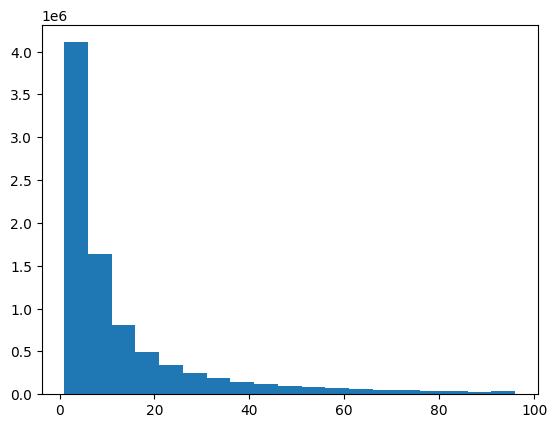

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of numbers
numbers = num_comments

# Create a histogram
plt.hist(numbers, bins=[a for a in range(1, 100, 5)])

# Show the plot
plt.show()

##### Temporal analysis

In [14]:
match_df = data_df.filter(pl.col('id').is_in(match_ids))

In [15]:
MILLISECONDS_IN_SECOND = 1000

datetimes = match_df.select((pl.col("created_utc") * MILLISECONDS_IN_SECOND).cast(
    pl.Datetime).dt.with_time_unit("ms").alias("datetime"))

match_df.replace("created_utc", datetimes['datetime'].dt.date())

/var/folders/by/rktr_w596p97pmt8_cbknvs80000gn/T/ipykernel_12700/2299943662.py:4: DeprecationWarning: `with_time_unit` is deprecated. Instead, first cast to `Int64` and then cast to the desired data type.
  pl.Datetime).dt.with_time_unit("ms").alias("datetime"))
/var/folders/by/rktr_w596p97pmt8_cbknvs80000gn/T/ipykernel_12700/2299943662.py:6: DeprecationWarning: `replace` is deprecated. DataFrame.replace is deprecated and will be removed in a future version. Please use
    df = df.with_columns(new_column.alias(column_name))
instead.
  match_df.replace("created_utc", datetimes['datetime'].dt.date())


id,created_utc,subreddit,author,url,title,selftext,num_comments,score,upvote_ratio
str,date,str,str,str,str,str,i64,i64,f64
"""k27lzk""",2020-11-27,"""politics""","""[deleted]""","""https://www.po…","""Blame game eru…","""[deleted]""",5,9,0.84
"""3ogmsk""",2015-10-12,"""Economics""","""ocamlmycaml""","""https://www.re…","""AotW: The Sver…","""Nobel Prize Le…",4,56,100.0
"""2wfh1y""",2015-02-19,"""ukipparty""","""erowidtrance""","""http://www.the…","""The Guardian u…","""""",5,11,100.0
"""3yvdga""",2015-12-31,"""EnoughLibertar…","""BenzJuan""","""http://talking…","""Popcorn Time: …","""""",7,20,100.0
"""mukrst""",2021-04-20,"""CoronavirusCA""","""AutoModerator""","""https://www.re…","""*Daily* Check-…","""We understand …",6,3,0.72
…,…,…,…,…,…,…,…,…,…
"""n72h80""",2021-05-07,"""worldpolitics""","""jormundr""","""https://i.redd…","""This is the wo…","""""",3,9,0.8
"""4xb5r0""",2016-08-12,"""The_Donald""","""tellman1257""","""https://www.re…","""Trump has ment…","""On **July 26, …",46,662,100.0
"""aoh3vk""",2019-02-08,"""politics""","""pnewell""","""https://mother…","""Alexandria Oca…","""""",148,1656,100.0


In [54]:
# 2015

df_2015 = match_df.filter(pl.col("created_utc") >= pl.datetime(2015,1,1)).filter(pl.col("created_utc") < pl.datetime(2016,1,1))
print('mean : {}'.format(statistics.mean(df_2015['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2015['num_comments'].to_list())))

mean : 9.238095238095237
median : 6


In [55]:
# 2016

df_2016 = match_df.filter(pl.col("created_utc") >= pl.datetime(2016,1,1)).filter(pl.col("created_utc") < pl.datetime(2017,1,1))
print('mean : {}'.format(statistics.mean(df_2016['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2016['num_comments'].to_list())))

mean : 18.09375
median : 5.5


In [56]:
# 2017

df_2017 = match_df.filter(pl.col("created_utc") >= pl.datetime(2017,1,1)).filter(pl.col("created_utc") < pl.datetime(2018,1,1))
print('mean : {}'.format(statistics.mean(df_2017['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2017['num_comments'].to_list())))

mean : 24.492957746478872
median : 5


In [57]:
# 2018

df_2018 = match_df.filter(pl.col("created_utc") >= pl.datetime(2018,1,1)).filter(pl.col("created_utc") < pl.datetime(2019,1,1))
print('mean : {}'.format(statistics.mean(df_2018['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2018['num_comments'].to_list())))

mean : 49.394366197183096
median : 7


In [58]:
# 2019

df_2019 = match_df.filter(pl.col("created_utc") >= pl.datetime(2019,1,1)).filter(pl.col("created_utc") < pl.datetime(2020,1,1))
print('mean : {}'.format(statistics.mean(df_2019['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2019['num_comments'].to_list())))

mean : 77.73626373626374
median : 7


In [59]:
# 2020

df_2020 = match_df.filter(pl.col("created_utc") >= pl.datetime(2020,1,1)).filter(pl.col("created_utc") < pl.datetime(2021,1,1))
print('mean : {}'.format(statistics.mean(df_2020['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2020['num_comments'].to_list())))

mean : 14.74
median : 7.5


In [60]:
# 2021

df_2021 = match_df.filter(pl.col("created_utc") >= pl.datetime(2021,1,1)).filter(pl.col("created_utc") < pl.datetime(2022,1,1))
print('mean : {}'.format(statistics.mean(df_2021['num_comments'].to_list())))
print('median : {}'.format(statistics.median(df_2021['num_comments'].to_list())))

mean : 64.0625
median : 7.5
